In [108]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import re
import camelot

In [109]:
r = requests.get('https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Situationsberichte/Gesamt.html')

In [110]:
r

<Response [200]>

In [111]:
soup = BeautifulSoup(r.text, 'lxml')

### Link finden 

In [112]:
links = soup.findAll('a', {'class': 'themenLink'})
link = links[0].get('href')
link

'/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Situationsberichte/Sept_2020/2020-09-21-de.pdf?__blob=publicationFile'

In [113]:
base = 'https://www.rki.de/'
url = base + link
url

'https://www.rki.de//DE/Content/InfAZ/N/Neuartiges_Coronavirus/Situationsberichte/Sept_2020/2020-09-21-de.pdf?__blob=publicationFile'

### Alternativer Versuch mit Camelot (Tabellen aus pdfs auslesen) 

In [114]:
tables = camelot.read_pdf(url, pages='7')

/home/p3nny/pfv/myvenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


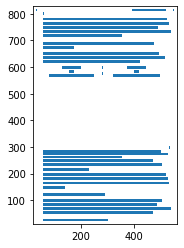

In [115]:
camelot.plot(tables[0], kind='text').show()

/home/p3nny/pfv/myvenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


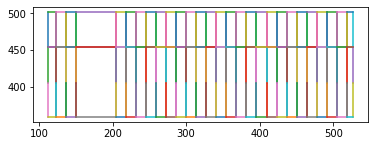

In [116]:
camelot.plot(tables[0], kind='grid').show()

In [117]:
tables = camelot.read_pdf(url, pages='7', flavor='stream', table_regions=['270,570,560,270'])
tables[0].df.head(15)

,0,1,2,3
0,7,,COVID-19-Lagebericht vom 21.09.2020,7
1,,,COVID-19-Fälle treten besonders in Zusammenhan...,
2,,,Anteil der Reiserückkehrer unter den Fällen ge...,
3,,Ausbrüche in Alten- und Pflegeheimen gemeldet;...,,
4,,,Einrichtungen für Asylbewerber und Geflüchtete...,
5,,Settings sowie in Zusammenhang mit religiösen ...,,
6,,Schätzung der Fallzahlen unter Berücksichtigun...,,
7,,Reproduktionszahl (R),,
8,,Die Reproduktionszahl R bezeichnet die Anzahl ...,,
9,,angesteckt werden. Diese lässt sich nicht aus ...,,
